In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn import preprocessing

In [171]:
files = glob.glob('*csv')
files

['Meteorite_Landings.csv',
 'GLC03122015.csv',
 'Fireball_And_Bolide_Reports.csv',
 'Near-Earth_Comets_-_Orbital_Elements.csv']

In [172]:
df = [pd.read_csv(element) for element in files]

In [290]:
df[2]
df[2].head()

,Date/Time - Peak Brightness (UT),Latitude (Deg),Longitude (Deg),Altitude (km),Velocity (km/s),Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,11/21/2009 08:53:00 PM,22.0S,29.2E,38.0,32.1,3.0,-17.0,-27.0,10000000000000,18.00
1,01/09/2015 10:41:11 AM,2.0N,28.8E,36.0,NaN,-10.7,-7.6,11.6,139000000000,0.41
2,05/16/2014 12:42:48 PM,44.2S,176.2W,44.0,NaN,14.4,4.6,6.5,309000000000,0.82
3,08/23/2014 06:29:41 AM,61.7S,132.6E,22.2,16.2,-2.3,5.7,16.5,3820000000000,7.60
4,12/12/2014 06:48:11 AM,33.5N,144.9E,26.3,NaN,11.5,-2.8,-2.2,33000000000,0.11


In [326]:
#North is + South is -, West is -, East is +
d_pal = { 'S': -1, 'N': +1, 'W':-1, 'E': +1}

In [327]:
loc_eig = df[2].iloc[:, 1:]
loc_eig.head()

,Latitude (Deg),Longitude (Deg),Altitude (km),Velocity (km/s),Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,22.0S,29.2E,38.0,32.1,3.0,-17.0,-27.0,10000000000000,18.00
1,2.0N,28.8E,36.0,NaN,-10.7,-7.6,11.6,139000000000,0.41
2,44.2S,176.2W,44.0,NaN,14.4,4.6,6.5,309000000000,0.82
3,61.7S,132.6E,22.2,16.2,-2.3,5.7,16.5,3820000000000,7.60
4,33.5N,144.9E,26.3,NaN,11.5,-2.8,-2.2,33000000000,0.11


In [329]:
loc_eig['Latitude (Deg)'].apply(lambda a: d_pal[a[-1]] * float(a[:-1]))
loc_eig['Longitude (Deg)'].apply(lambda a: d_pal[a[-1]] * float(a[:-1]))
loc_eig.head()

,Latitude (Deg),Longitude (Deg),Altitude (km),Velocity (km/s),Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,22.0S,29.2E,38.0,32.1,3.0,-17.0,-27.0,10000000000000,18.00
1,2.0N,28.8E,36.0,NaN,-10.7,-7.6,11.6,139000000000,0.41
2,44.2S,176.2W,44.0,NaN,14.4,4.6,6.5,309000000000,0.82
3,61.7S,132.6E,22.2,16.2,-2.3,5.7,16.5,3820000000000,7.60
4,33.5N,144.9E,26.3,NaN,11.5,-2.8,-2.2,33000000000,0.11


In [195]:
#loc_eig = loc_eig.drop(23, axis = 0)

In [196]:
loc_eig = loc_eig.fillna(loc_eig.mean())
loc_eig.head()

,Velocity Components (km/s): vx,Velocity Components (km/s): vy,Velocity Components (km/s): vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,3.0,-17.0,-27.0,10000000000000,18.00
1,-10.7,-7.6,11.6,139000000000,0.41
2,14.4,4.6,6.5,309000000000,0.82
3,-2.3,5.7,16.5,3820000000000,7.60
4,11.5,-2.8,-2.2,33000000000,0.11


In [210]:
x = loc_eig.iloc[:, :].values

In [254]:
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)

In [255]:
x.shape

(91, 5)

In [270]:
c = np.dot(x.T, x)

In [271]:
c.shape

(5, 5)

In [272]:
[U, S, V] = np.linalg.svd(c)

In [274]:
#PCA Space
Z = np.dot(x, U[:, :4])

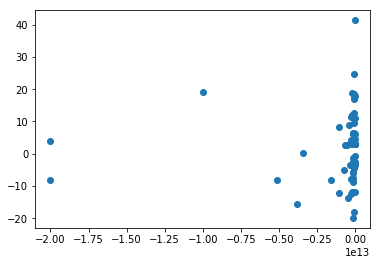

In [275]:
plt.scatter(Z[:, 0],Z[:, 1] )

In [277]:
x_r = np.dot(Z, U[:, :4].T)

In [281]:
loc_eig.mean()

Velocity Components (km/s): vx         1.247059e+00
Velocity Components (km/s): vy        -2.631373e+00
Velocity Components (km/s): vz        -1.113725e+00
Total Radiated Energy (J)              8.306264e+11
Calculated Total Impact Energy (kt)    1.581934e+00
dtype: float64